In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-fd28b95a-8f53-2a42-8836-0f316c67dcd3)
GPU 1: Tesla T4 (UUID: GPU-bd46f73b-445e-a909-ac1c-f38e9f037261)


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_24/1948985775.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [4]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


Total no of disaster tweets:  4342
Percent of disaster tweets:  57.03%


Total no of non-disaster tweets:  3271
Percent of non-disaster tweets:  42.97%


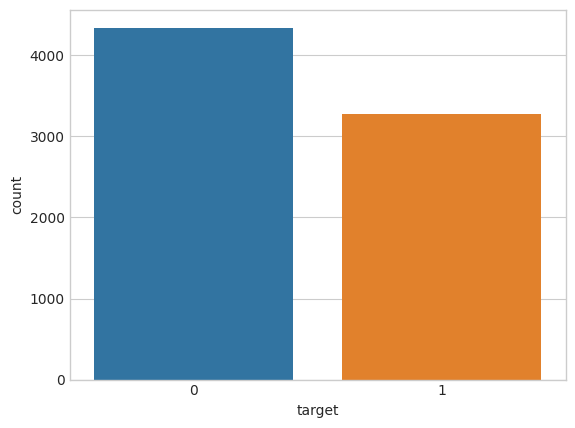

In [6]:
sns.countplot(train_df, x="target")
cnt = train_df['target'].value_counts()
print("Total no of disaster tweets: ",cnt[0])
print("Percent of disaster tweets: ",f'{cnt[0]/len(train_df)*100:.2f}%')
print("\n")
print("Total no of non-disaster tweets: ",cnt[1])
print("Percent of non-disaster tweets: ",f'{cnt[1]/len(train_df)*100:.2f}%')

In [7]:
import random
start_range = 0
end_range = len(train_df)
random_list = list(random.sample(range(start_range, end_range + 1), 6))
for i in random_list:
    row = train_df.iloc[i]
    print("Label ", row['target'], "(real disaster)" if row['target'] == 1 else "(not real disaster)")
    print("Text \n",row['text'])
    print("--"*21,'\n')
    

Label  0 (not real disaster)
Text 
 Top link: Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/u9ao3A4oGC
------------------------------------------ 

Label  0 (not real disaster)
Text 
 okay the cat has been quarantined in my bathroom...its meowing really loud but I turned up the TV louder...things just might work out okay
------------------------------------------ 

Label  1 (real disaster)
Text 
 Reddit Will Now QuarantineÛ_ http://t.co/pkUAMXw6pm #onlinecommunities #reddit #amageddon #freespeech #Business http://t.co/PAWvNJ4sAP
------------------------------------------ 

Label  1 (real disaster)
Text 
 California cops have sketch of gunman who killed one wounded two deputies via the @FoxNews app http://t.co/3Ife1zsop7
------------------------------------------ 

Label  1 (real disaster)
Text 
 Pendleton media office said only fire on base right now is the Horno blaze.
------------------------------------------ 

Label  0 (not

In [8]:
train_df.iloc[1]

id                                               4
keyword                                        NaN
location                                       NaN
text        Forest fire near La Ronge Sask. Canada
target                                           1
Name: 1, dtype: object

#### Number of characters present in each tweet

<Axes: >

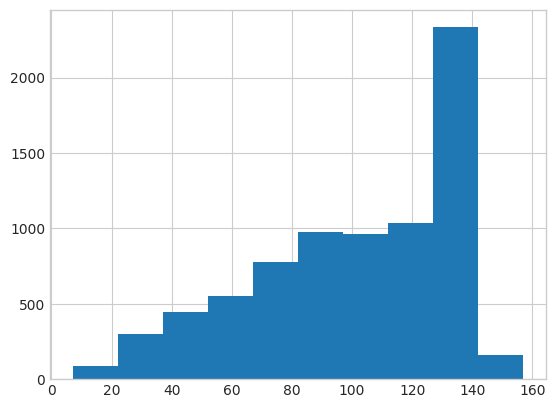

In [9]:
train_df['text'].str.len().hist()

In [10]:
train_df['char_len'] = train_df['text'].apply(len)

In [11]:
train_df

,id,keyword,location,text,target,char_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


Text(0.5, 1.0, 'Disaster tweets')

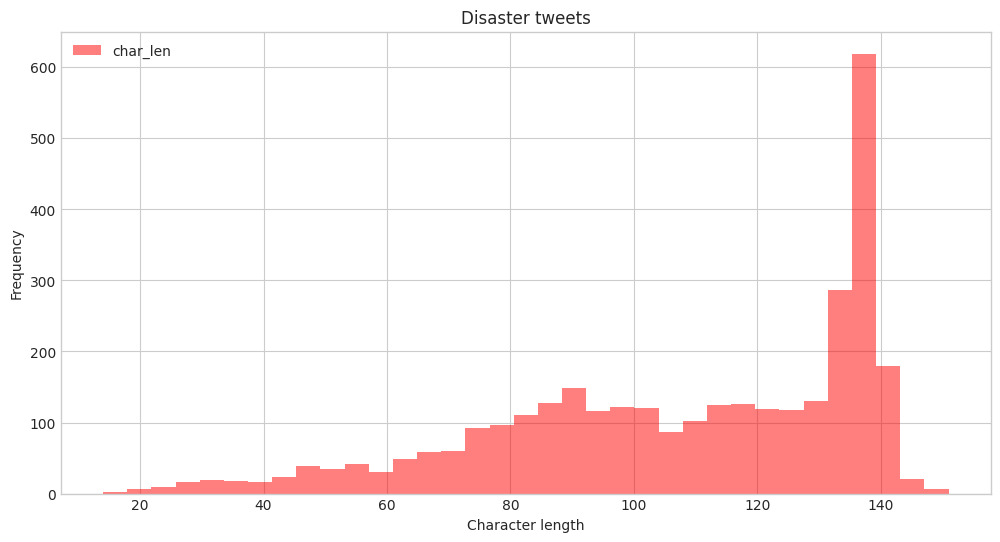

In [12]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['char_len'].plot(bins=35, kind='hist', color='red',alpha=.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

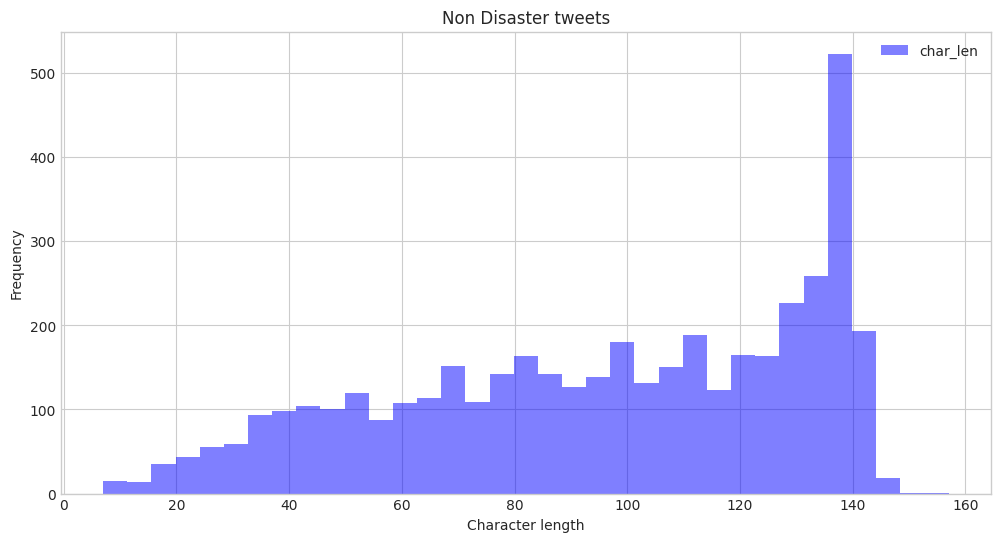

In [13]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['char_len'].plot(bins=35, kind='hist', color='blue',alpha=.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Number of words present in each tweet

In [14]:
train_df['word_len'] = train_df['text'].str.split().map(lambda x: len(x))

<Axes: >

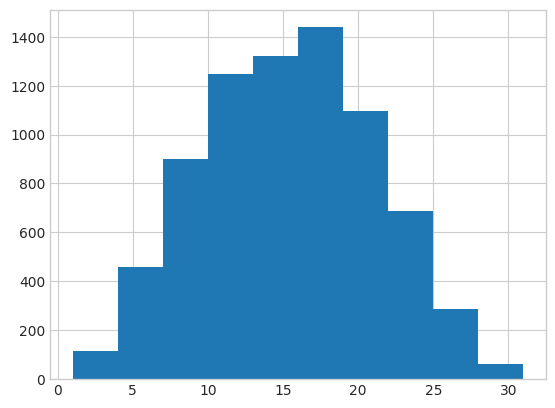

In [15]:
train_df['text'].str.split().map(lambda x: len(x)).hist()

Text(0.5, 1.0, 'Disaster tweets')

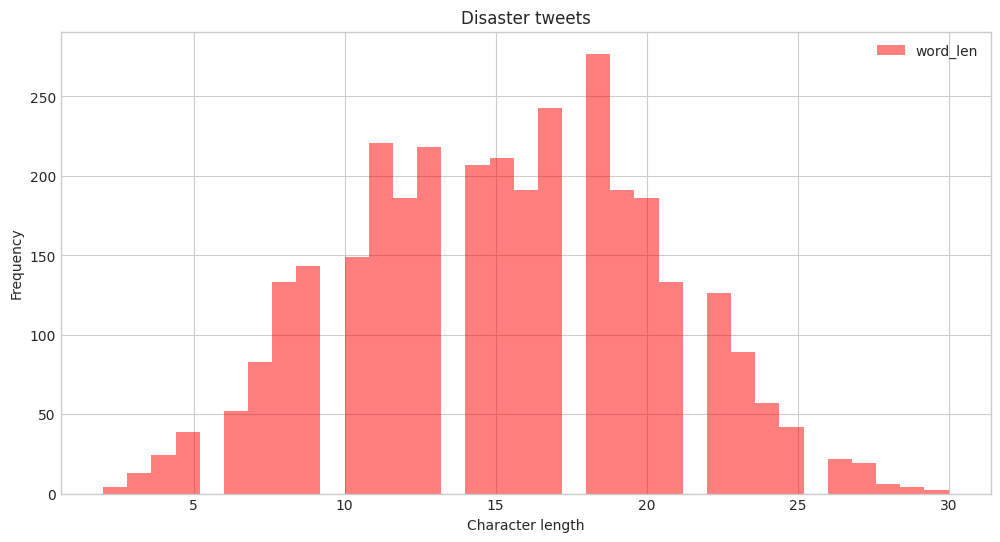

In [16]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==1]['word_len'].plot(bins=35, kind='hist', color='red',alpha=0.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Disaster tweets")

Text(0.5, 1.0, 'Non Disaster tweets')

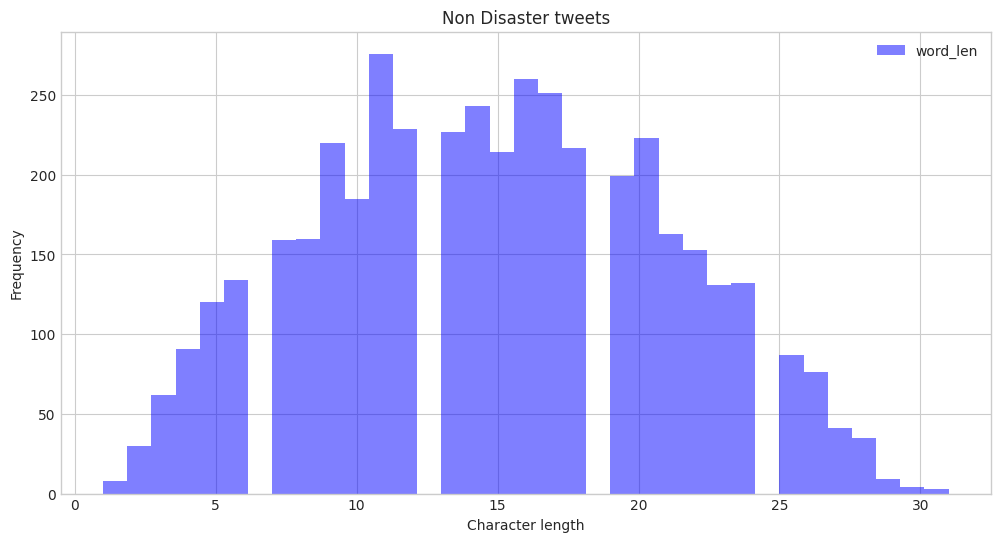

In [17]:
plt.figure(figsize=(12, 6))
train_df[train_df['target']==0]['word_len'].plot(bins=35, kind='hist', color='blue',alpha=0.5)
plt.legend()
plt.xlabel("Character length")
plt.title("Non Disaster tweets")

#### Descriptive Statistics

In [18]:
print("Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==1].describe().T

Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,3271.0,108.113421,29.309854,14.0,88.0,115.0,136.0,151.0
word_len,3271.0,15.167533,5.096806,2.0,11.0,15.0,19.0,30.0


In [19]:
print("Non Disaster tweets \n")
train_df[['char_len', 'word_len']][train_df.target==0].describe().T

Non Disaster tweets 



,count,mean,std,min,25%,50%,75%,max
char_len,4342.0,95.706817,35.885924,7.0,68.0,101.0,130.0,157.0
word_len,4342.0,14.704744,6.161564,1.0,10.0,15.0,19.0,31.0


In [20]:
train_df['contains_link'] = train_df['text'].str.contains("https")
contains_link = train_df[(train_df["contains_link"] == True)]['target'].value_counts()
print("Disaster tweets that contains a link in the text body ", contains_link[1],'\n')
print("Non Disaster tweets that contains a link in the text body ", contains_link[0],'\n')

Disaster tweets that contains a link in the text body  134 

Non Disaster tweets that contains a link in the text body  273 



#### Stop words

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
corpus=[]
text = train_df['text'].str.split()
text = text.values.tolist()
corpus=[word for i in text for word in i]

from collections import defaultdict
dic=defaultdict(int)
non_dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
    if word not in stop:
        non_dic[word]+=1

In [23]:
stop_words_cnt = pd.DataFrame(list(dic.items()), columns=['word', 'count'])
nonstop_words_cnt = pd.DataFrame(list(non_dic.items()), columns=['word', 'count'])

In [24]:
def plotwords(df,cnt=15):
    df = df.sort_values(by='count', ascending=False)[:cnt]
    plt.figure(figsize=(18, 6))
    sns.barplot(x='word', y='count', data=df)
    # Add labels to the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
                fontsize=12, color='black', ha='center', va='bottom')

    # Customize plot
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()

#### Top 15 stop words

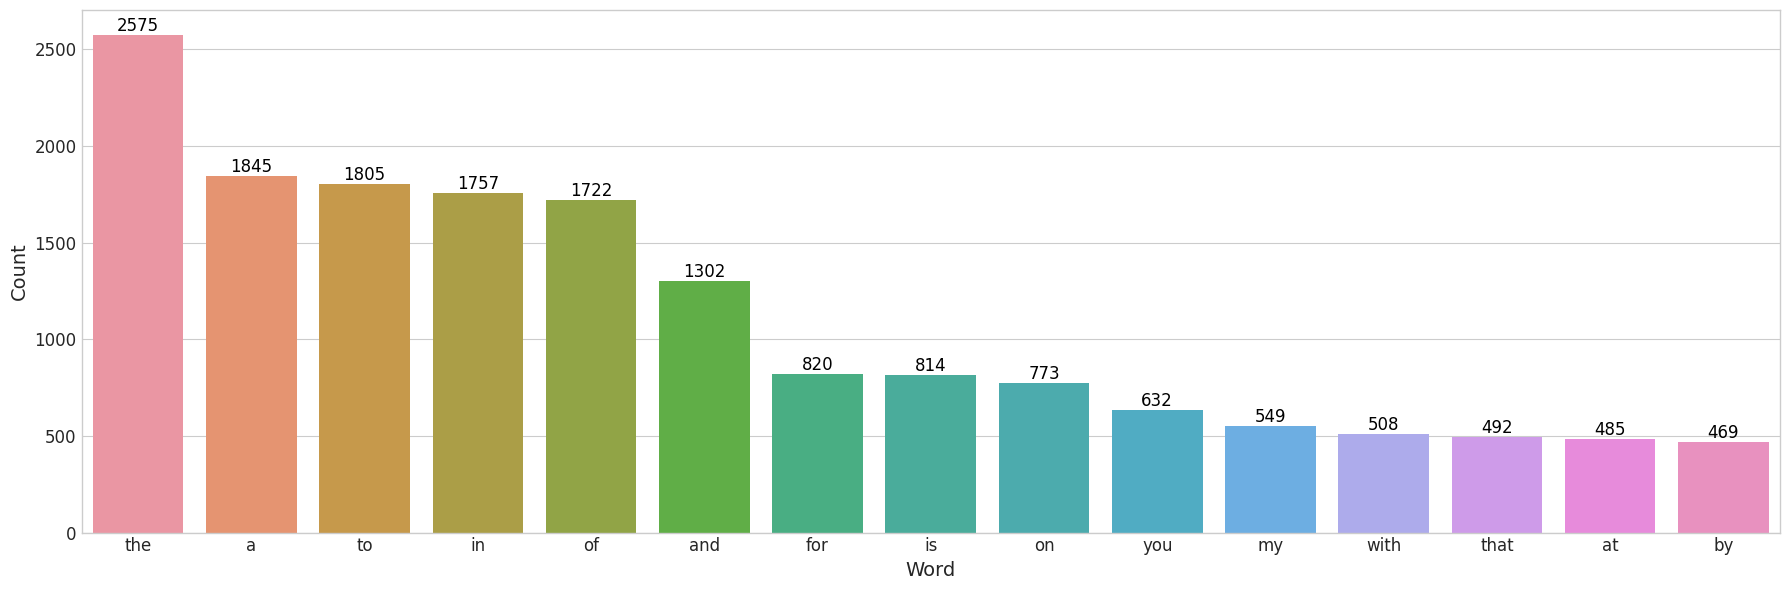

In [25]:
plotwords(stop_words_cnt)

#### Top 15 non-stop words

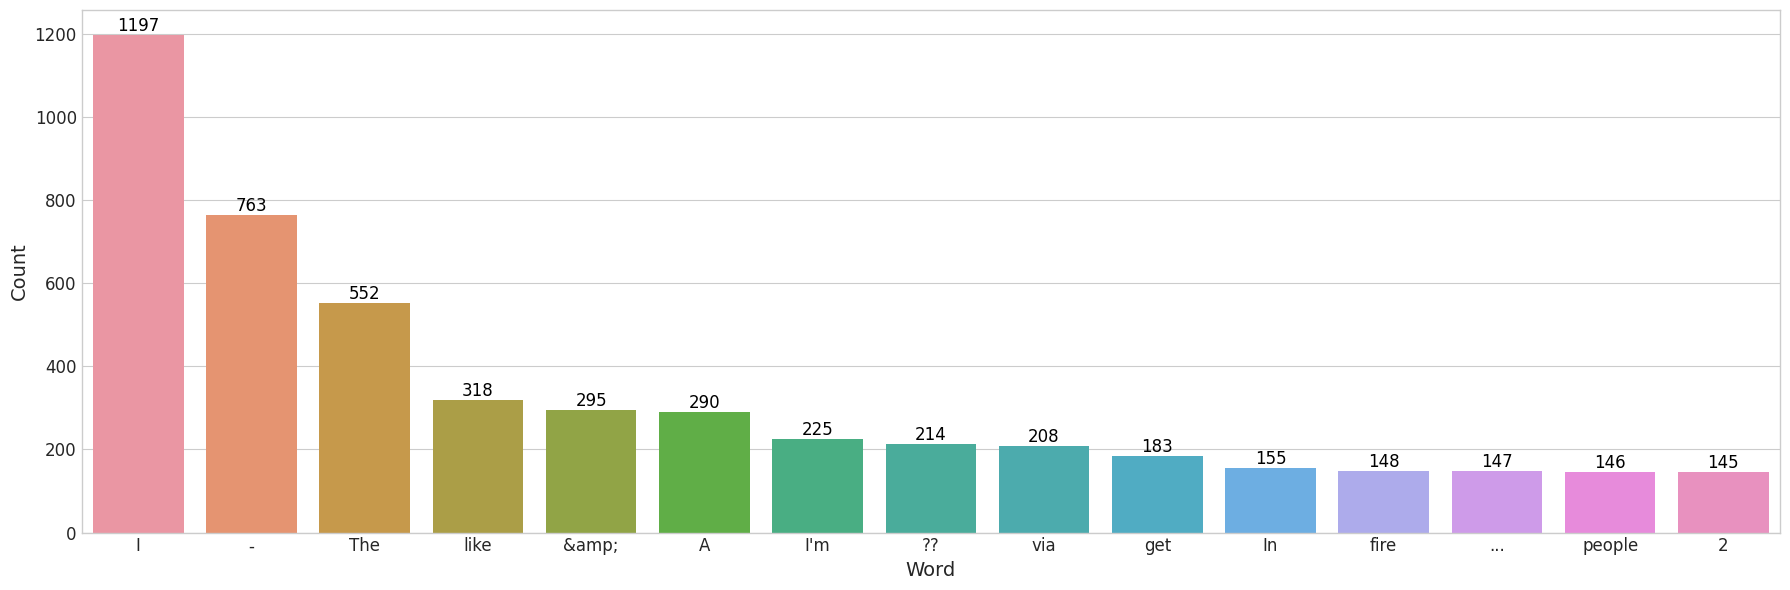

In [26]:
plotwords(nonstop_words_cnt)

#### Train-val split

In [27]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(),
                                                                            train_df["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42) 

In [28]:
train_sentences

array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
       'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3',
       "When I was cooking earlier I got electrocuted some crucial ?????? now I'm psychic lol",
       ...,
       'Omron HEM-712C Automatic Blood Pressure Monitor STANDARD AND LARGE BP CUFFS http://t.co/gJBAInQWN9 http://t.co/jPhgpL1c5x',
       'Officials say a quarantine is in place at an Alabama home over a possible Ebola case after developing symptoms... http://t.co/rqKK15uhEY',
       'I moved to England five years ago today. What a whirlwind of time it has been! http://t.co/eaSlGeA1B7'],
      dtype=object)

#### Vectorization and Embeddings

In [29]:
# average words
avg_words = round(train_df[['char_len', 'word_len']][train_df.target==1].describe()['word_len']['mean'])
avg_words

15

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
max_vocab_length = 10000
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=avg_words)

2024-04-12 06:51:12.578811: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 06:51:12.578929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 06:51:12.853783: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [31]:
text_vectorizer.adapt(train_sentences)

In [32]:
# Create sample sentence and tokenize it
example_sentences = ["Just felt a huge earthquake. Stay safe everyone! #earthquake #safety",
                     "Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation",
                     "Massive flooding in the area. Roads are impassable. Stay indoors and stay safe. #flood #safety"]
for s in example_sentences:
    print(s,'\n')
    print(text_vectorizer([s]),'\n')
    print("-"*64,'\n')

Just felt a huge earthquake. Stay safe everyone! #earthquake #safety 

tf.Tensor(
[[  30 1200    3  848  221  586 2735  232  221  976    0    0    0    0
     0]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 

Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation 

tf.Tensor(
[[ 247 1268  897   26  157 2183  109 5017 9625   10 2486  976  157  247
     0]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 

Massive flooding in the area. Roads are impassable. Stay indoors and stay safe. #flood #safety 

tf.Tensor(
[[1647  246    4    2  402 1620   21    1  586 5331    7  586 2735  206
   976]], shape=(1, 15), dtype=int64) 

---------------------------------------------------------------- 



In [33]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_shape=(avg_words,),
                             name="embedding_1") 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
for s in example_sentences:
    print(s,'\n')
    print(embedding(text_vectorizer([s])),'\n')
    print("-"*64,'\n')

Just felt a huge earthquake. Stay safe everyone! #earthquake #safety 

tf.Tensor(
[[[ 0.00450604  0.02877844  0.02428457 ...  0.02021216 -0.03224035
    0.04560881]
  [-0.03286411 -0.04903897  0.00030058 ...  0.00575603 -0.01309697
   -0.01824504]
  [-0.0220649   0.03031768 -0.0156626  ... -0.00161445  0.03883393
    0.01512024]
  ...
  [-0.03483542  0.04884103  0.01103633 ...  0.02590649  0.01993194
    0.04027212]
  [-0.03483542  0.04884103  0.01103633 ...  0.02590649  0.01993194
    0.04027212]
  [-0.03483542  0.04884103  0.01103633 ...  0.02590649  0.01993194
    0.04027212]]], shape=(1, 15, 128), dtype=float32) 

---------------------------------------------------------------- 

Evacuation orders issued as wildfire approaches our neighborhood. Praying for everyone's safety. #wildfire #evacuation 

tf.Tensor(
[[[ 0.00989012  0.01062776  0.04161963 ... -0.03713923 -0.00054854
   -0.03291792]
  [-0.03655046  0.0366486  -0.0404898  ... -0.02331482 -0.02794393
    0.00165013]
  [ 0.014

### Modeling experiments

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_one = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

model_one.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [36]:
baseline_score = model_one.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 77.82%


In [37]:
sample_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [38]:
test_sentences = test_df["text"].to_numpy()

In [39]:
sample_submission["target"] = model_one.predict(test_sentences)

In [40]:
sample_submission.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [41]:
sample_submission.describe()

,id,target
count,3263.000000,3263.000000
mean,5427.152927,0.292063
std,3146.427221,0.454781
min,0.000000,0.000000
25%,2683.000000,0.000000
50%,5500.000000,0.000000
75%,8176.000000,1.000000
max,10875.000000,1.000000


In [42]:
sample_submission.to_csv("submission.csv", index=False)